Name:Hamza Patel
Roll:2305215
insurance logistic reg

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("insurance2.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def train_logistic_regression(X, y, lr=0.01, epochs=2000):
    m, n = X.shape
    X = np.c_[np.ones(m), X]   # Add bias term
    weights = np.zeros(n + 1)

    for _ in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        weights -= lr * dw

    return weights
def predict(X, weights):
    m = X.shape[0]
    X = np.c_[np.ones(m), X]
    probs = sigmoid(np.dot(X, weights))
    return np.where(probs >= 0.5, 1, 0)
weights = train_logistic_regression(X_train, y_train)
y_pred = predict(X_test, weights)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))

Accuracy: 85.67164179104478 %
Confusion Matrix:
 [[110  22]
 [ 26 177]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       132
           1       0.89      0.87      0.88       203

    accuracy                           0.86       335
   macro avg       0.85      0.85      0.85       335
weighted avg       0.86      0.86      0.86       335



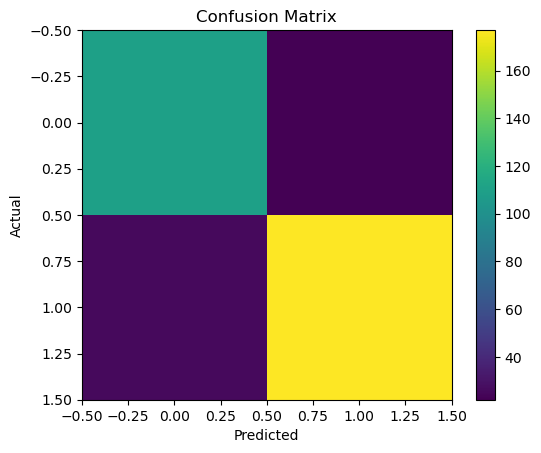

In [7]:
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()